# Data Loading

In [227]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.io.parquet import to_parquet

In [228]:
# Define path to raw data files
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..", "data", "raw"))

In [229]:
# files in the data directory
files = os.listdir(data_path)

In [230]:
# Create a dictionary where each key is a file name and the value is a DataFrame with the data.
custom_names = {
    "olist_customers_dataset.csv": "customer",
    "olist_geolocation_dataset.csv": "geolocation",
    "olist_order_items_dataset.csv": "order_items",
    "olist_order_payments_dataset.csv": "payments",
    "olist_orders_dataset.csv": "orders",
    "olist_products_dataset.csv": "products",
    "olist_sellers_dataset.csv": "sellers"
}

dfs = {
    custom_names[file]: pd.read_csv(os.path.join(data_path, file))
    for file in files if file in custom_names
}

# Data Cleaning and preprocessing

## Orders Dataframe: treatment and Type Conversion

In [231]:
orders = dfs["orders"]  # Extract the 'orders' DataFrame

#### Null and Missing values treatment

In [232]:
# Identifying null or missing values.
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


There are null numerical values in the order approval date column, indicating that the orders were not approved. The shipping date column also contains null values, indicating that the order was not shipped. Lastly, the delivery date column also contains null values, indicating that the order was not delivered. However, the data will be kept as is, since the column type will be changed to datetime and the null values will become NaT (Not a Time). This maintains data consistency and avoids issues with operations involving dates.

In [233]:
# Checking column data types
print(orders.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


#### Columns type conversion


Converting date columns from object to datetime

In [234]:

date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

In [235]:
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors="coerce")

Converting "order status" column from object to category

In [236]:
orders["order_status"] = orders["order_status"].astype("category")

## Orders Items Dataframe: treatment and Type Conversion

In [237]:
order_items = dfs["order_items"]  # Extract the 'order_items' DataFrame

#### Null and Missing values treatment

In [238]:
# Identifying null or missing values.
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [239]:
# Checking column data types
print(order_items.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Converting date columns from object to datetime

In [240]:
order_items["shipping_limit_date"] = pd.to_datetime(
    order_items["shipping_limit_date"], errors="coerce")

## Customers Dataframe: treatment and Type Conversion

In [241]:
customer = dfs["customer"]  # Extract the 'customers' DataFrame

#### Null and Missing values treatment

In [242]:
# Identifying null or missing values.
print(customer.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [243]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Products Dataframe: treatment and Type Conversion

In [244]:
products = dfs["products"]  # Extract the 'products' DataFrame

#### Null and Missing values treatment

In [245]:
# Identifying null or missing values.
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Null values were found in the product category name, which will be filled with "Unknown". Null values were also found in the columns: product name length, description length, and number of photos. These will be filled with the median to avoid distortions caused by extreme values. Finally, two null values were found in the columns: weight, length, height, and width. All of these will also be filled with the median.

In [246]:
# Null and missing values treatment.
products["product_category_name"].fillna("Unknown", inplace=True)
num_cols = [
    "product_name_lenght", "product_description_lenght",
    "product_photos_qty", "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]
for col in num_cols:
    products[col].fillna(products[col].median(), inplace=True)

#### Columns type conversion

In [247]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Sellers Dataframe: treatment and Type Conversion

In [248]:
sellers = dfs["sellers"]  # Extract the 'sellers' DataFrame

#### Null and Missing values treatment

In [249]:
# Identifying null or missing values.
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [250]:
# Checking column data types
print(sellers.dtypes)

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


The column data types are correct.

## Payments Dataframe: treatment and Type Conversion

In [251]:
payments = dfs["payments"]  # Extract the 'payments' DataFrame

#### Null and Missing values treatment

In [252]:
# Identifying null or missing values.
print(payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [253]:
# Checking column data types
print(payments.dtypes)

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


Converting 'payment_type' column from object to category.

In [254]:
payments["payment_type"] = payments["payment_type"].astype("category")

## Geolocation: treatment and Type Conversion

In [255]:
geolocation = dfs["geolocation"]  # Extract the 'geolocation' DataFrame

#### Null and Missing values treatment

In [256]:
# Identifying null or missing values.
print(geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [257]:
# Checking column data types
print(geolocation.dtypes)

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


The column data types are correct.

## Pré processing - Checking data consistency

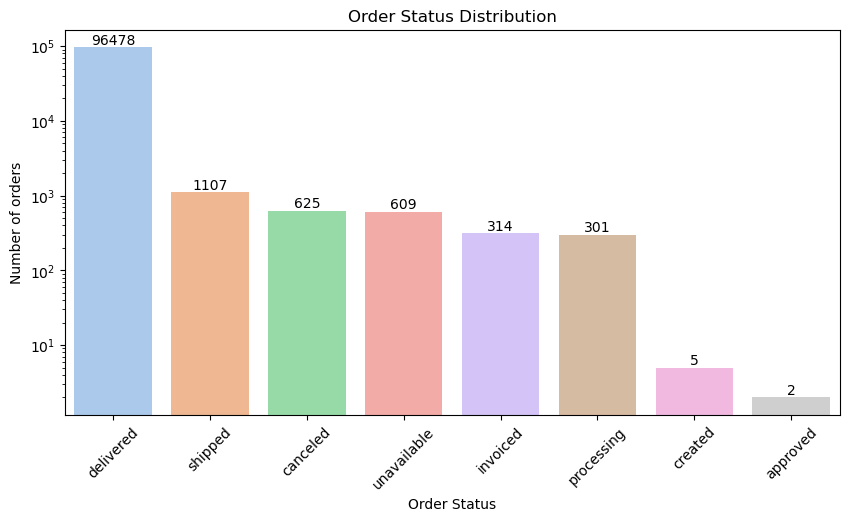

In [258]:
# Orders counts by status

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=orders, x ="order_status", order=orders["order_status"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of orders")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )
plt.show()



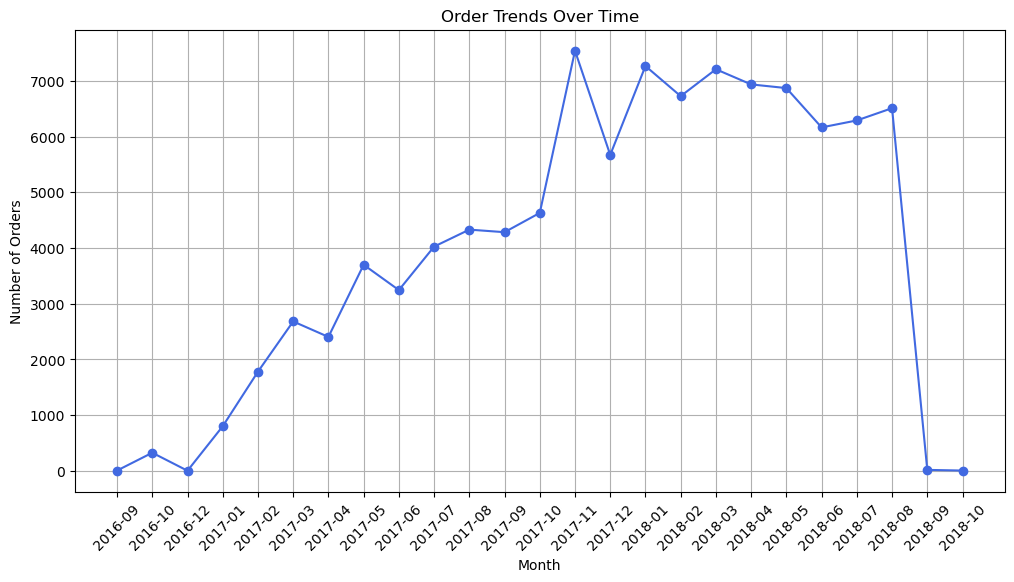

In [259]:
# Orders over time
orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Order Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There was a growth trend in the number of orders from December 2016 to November 2017, 
followed by a stabilization period from December 2017 to August 2018. However, there was 
a sharp drop in orders from August to October. It's important to check whether there is 
data available for the final months or if the dataset simply ends there.

In [260]:
# Checking if data exists for the last months
print(monthly_orders.tail(30))  # Last 10 months available

order_purchase_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


There were orders in the last months, but the quantity is well below normal, indicating that the dataset is likely incomplete for the final and initial months.

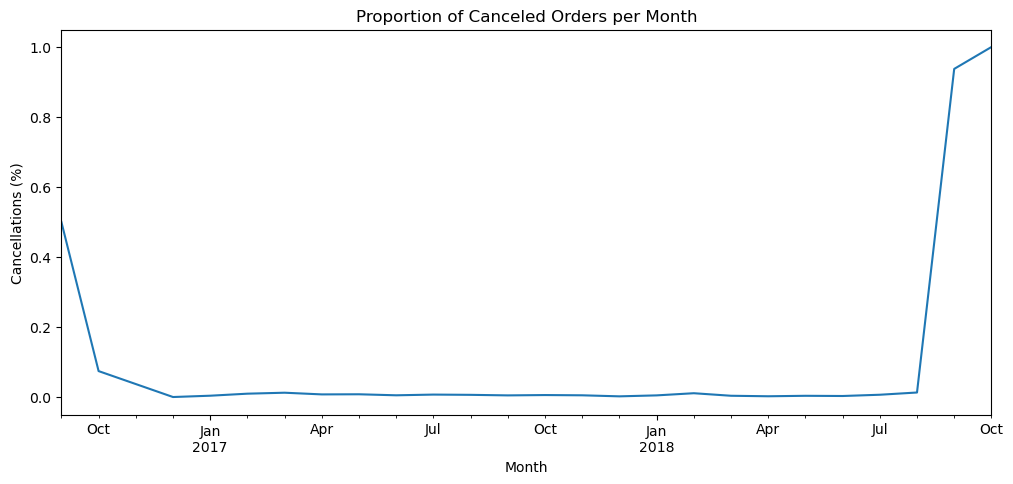

In [261]:
# Checking order cancellations over time

orders.groupby("order_purchase_month")["order_status"].value_counts(normalize=True).unstack()["canceled"].plot(
    kind="line", figsize=(12, 5))
plt.title("Proportion of Canceled Orders per Month")
plt.xlabel("Month")
plt.ylabel("Cancellations (%)")
plt.show()

The graph shows that the proportion of canceled orders rose to around 100% in the last few months.

### Data Note

The charts indicate that there is a normal pattern in the data, except for the months with less than 500 orders, like: 2016-09, 2016-10, 2016-12, 2018-09 and 2018-10. The likely reason is that the data is incomplete. Therefore, the chosen approach to prevent this discrepancy in order volume from affecting further analyses and models will be remove the rows related to those months.

#### REMOVING ROWS RELATED TO MONTHS WITH DATA DISCREPANCIES

In [262]:
def olist_filter_and_save(
    orders, order_items, payments, customer, products, sellers
):
    # Orders purchase count by month
    order_counts = orders['order_purchase_month'].value_counts()
    valid_months = order_counts[order_counts >= 500].index

    # Filtering the orders by valid months.
    orders_filtered = orders[orders['order_purchase_month'].isin(valid_months)]

    # Valid IDs
    valid_order_ids = orders_filtered['order_id']
    valid_customer_ids = orders_filtered['customer_id']

    # Filtering other dataframes based on valid data
    order_items_filtered = order_items[order_items['order_id'].isin(valid_order_ids)]
    payments_filtered = payments[payments['order_id'].isin(valid_order_ids)]
    customer_filtered = customer[customer['customer_id'].isin(valid_customer_ids)]
    products_filtered = products[products['product_id'].isin(order_items_filtered['product_id'])]
    sellers_filtered = sellers[sellers['seller_id'].isin(order_items_filtered['seller_id'])]

    # Dictionary with filtered DataFrames
    dfs = {
        "orders": orders_filtered,
        "order_items": order_items_filtered,
        "payments": payments_filtered,
        "customer": customer_filtered,
        "products": products_filtered,
        "sellers": sellers_filtered,
    }

    # Relative path to save files
    current_dir = os.getcwd()
    processed_path = os.path.abspath(os.path.join(current_dir, "..", "data", "processed"))

    # Save DataFrames to CSV files
    for file_name, df in dfs.items():
        file_path = os.path.join(processed_path, f"{file_name}.csv")
        df.to_csv(file_path, index=False)

    return dfs

In [263]:
# Call the function to apply the filter and save the files
dfs_filtered = olist_filter_and_save(orders, order_items, payments, customer, products, sellers)


In [264]:
#Accessing the filtered DataFrames from the 'dfs_filtered' dictionary
orders_filtered = dfs_filtered['orders'].copy()
order_items_filtered = dfs_filtered['order_items'].copy()
payments_filtered = dfs_filtered['payments'].copy()
customer_filtered = dfs_filtered['customer'].copy()
products_filtered = dfs_filtered['products'].copy()
sellers_filtered = dfs_filtered['sellers'].copy()

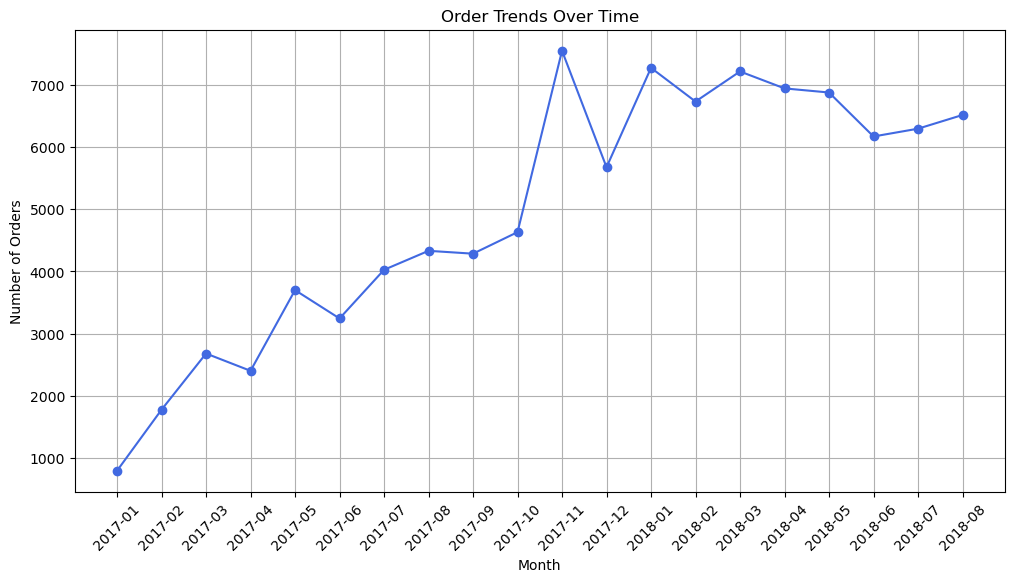

In [265]:
orders_filtered["order_purchase_month"] = orders_filtered["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders_filtered.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Order Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Feature Engineering


In this project, I will perform an in-depth data analysis on a Brazilian marketplace dataset to predict whether an order will be delivered late or not.
I will start by integrating relevant datasets and creating new features that may influence delivery delays.



## Target Variable
The target variable will be a binary feature "is_late", the variable based on the order delivered customer date and order estimated delivery date, indicate if a order was delivered late.

In [266]:
# Was it delivered late?
# Binary feature (0 = on time or early, 1 = late)
orders_filtered["is_late"] = (
    orders_filtered["order_delivered_customer_date"] > orders_filtered["order_estimated_delivery_date"]
).astype(int)

## Merging the datasets

In [267]:
# Merging the datasets
df_merged = orders_filtered.merge(order_items_filtered, on='order_id', how='left')
df_merged  = df_merged.merge(customer_filtered, on='customer_id', how='left')
df_merged  = df_merged.merge(products_filtered, on='product_id', how='left')
df_merged  = df_merged.merge(payments_filtered, on='order_id', how='left')
df_merged  = df_merged.merge(sellers_filtered, on='seller_id', how='left')

## Product Volume Feature
It will be create a feature that represents the product volume. The volume could affect the logistic transportantion, leading possibles order delays.

In [268]:
# Product Volume
df_merged['product_volume'] = df_merged['product_length_cm']*df_merged['product_height_cm']*df_merged['product_width_cm']

## Distance between customer and seller
The distance between customer and seller could affect the time of transportantion, leading possibles order delays.

In [269]:
# Group by zip code prefix and calculate the coordinates overall mean.
geo_mean = geolocation.groupby('geolocation_zip_code_prefix', as_index = False).agg({
        'geolocation_lat': 'mean',
        'geolocation_lng': 'mean'
})

In [270]:
# Rename from geolocation lat and long to customer lat and long
customer_geo = geo_mean.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
})

In [271]:
# Rename from geolocation lat and long to seller lat and long
seller_geo = geo_mean.rename(columns={
    'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
})

In [272]:
# Merge the datagrame customer_geo and seller_geo with df_merged
df_merged = df_merged.merge(customer_geo, on='customer_zip_code_prefix', how='left')
df_merged = df_merged.merge(seller_geo, on='seller_zip_code_prefix', how='left')

In [273]:
# Euclidian distance between customer and seller
df_merged['distance_seller_customer'] = np.sqrt(
    (df_merged['customer_lat'] - df_merged['seller_lat'])**2 +
    (df_merged['customer_lng'] - df_merged['seller_lng'])**2
)

In [274]:
# Transform the distance between customer and seller categorical variable.
df_merged['distance_category'] = pd.cut(df_merged['distance_seller_customer'], bins=[0, 10, 50, 100, 200], labels=['short', 'medium', 'long', 'very_long'])


## Estimated time delivery (days)
If the estimated time delivery doesn't fit with the necessary time to delivery the order, could lead to an orders delays.

In [275]:
df_merged['estimated_time'] = (df_merged['order_estimated_delivery_date'] - df_merged['order_approved_at']).dt.days

# Exploratory Data Analysis

The focus of this analysis is to explore and analyze the delivery delays of orders in a Brazilian e-commerce marketplace. We will identify patterns related to late deliveries, look for factors that could influence delays.

## Categorical features
The first step will be select and transform the categorical features in bynaries to fit in our first model try.
The transformation using OneHotEncoder is mainly recommended for categorical nominal variables, that is, when there is no order among the categories. 

In [276]:
# The dataset merged columns    
df_merged.columns.unique()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_purchase_month', 'is_late', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_volume', 'customer_lat', 'customer_lng',
       'seller_lat', 'seller_lng', 'distance_seller_customer',
       'distance_category', 'estimated_time'],
      dtype='object')

In [277]:
# create df with categorical features
df_cat = df_merged[[
    'order_purchase_month',
    'customer_state',
    'seller_state',
    'distance_category'
]]

In [278]:
# checking null values
df_cat.isnull().sum()

order_purchase_month       0
customer_state             0
seller_state             794
distance_category       1392
dtype: int64

In [279]:
#Null values treatment
df_cat = df_cat.apply(lambda col: col.fillna(col.mode()[0]), axis=0)

In [280]:
# import libraries
from sklearn.preprocessing import OneHotEncoder


In [281]:
# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
cat_transf = encoder.fit_transform(df_cat)


In [282]:
# Dataframe transform
df_cat_transform = pd.DataFrame(
    cat_transf,
    columns=encoder.get_feature_names_out(df_cat.columns),
    index=df_merged.index
)

In [283]:
df_cat_transform.head()

,order_purchase_month_2017-01,order_purchase_month_2017-02,order_purchase_month_2017-03,order_purchase_month_2017-04,order_purchase_month_2017-05,order_purchase_month_2017-06,order_purchase_month_2017-07,order_purchase_month_2017-08,order_purchase_month_2017-09,order_purchase_month_2017-10,...,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP,distance_category_long,distance_category_medium,distance_category_short
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [284]:
# Train and test
from sklearn.model_selection import train_test_split
X = df_cat_transform
y = df_merged['is_late']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify=y
)


In [285]:
# Training a model using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state= 42 )
rf.fit(X_train, y_train )

RandomForestClassifier(class_weight='balanced', random_state=42)

In [286]:
# Categorical feature importance
def feature_importance(feature, importance):
    importance_df = pd.DataFrame({
        'feature': feature,
        'importance': importance
    }).sort_values(by='importance', ascending=False)
    return importance_df

In [287]:
importance_df = feature_importance(df_cat_transform.columns, rf.feature_importances_)

In [288]:
# Plot
def importance_barplot (title):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df.head(20), x='importance', y='feature')
    plt.title(title)
    plt.grid(True)
    return plt.show()

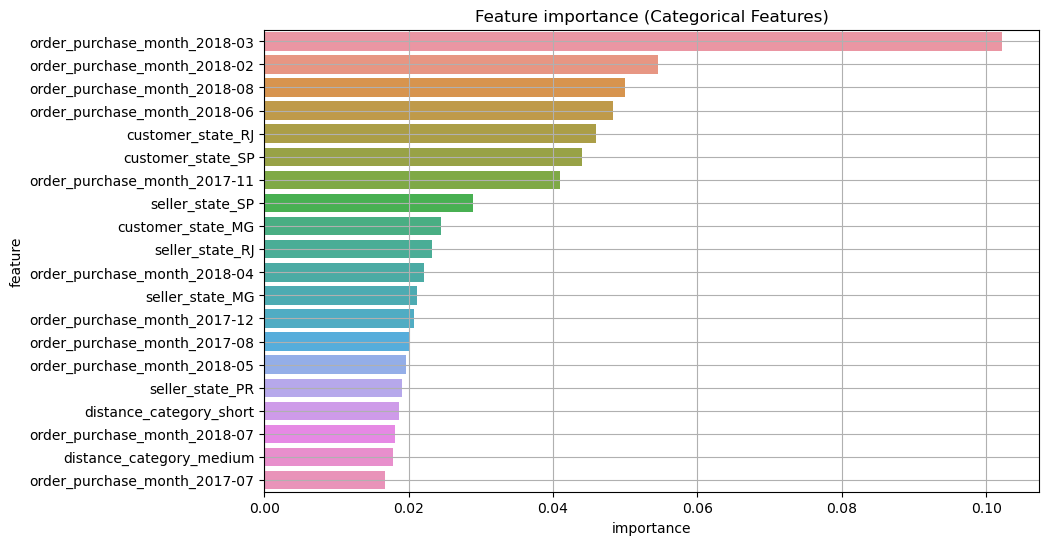

In [289]:
importance_barplot('Feature importance (Categorical Features)')

## Numeric Features
In this step, the import columns with the numeric features will be select.

In [290]:
# selecting numeric features
df_numeric = df_merged[['product_volume',
                        'product_weight_g',
                        'freight_value',
                        'payment_value',
                        'price',
                        'estimated_time',
]]

In [291]:
# checking null values
df_numeric.isnull().sum()

product_volume      794
product_weight_g    794
freight_value       794
payment_value         0
price               794
estimated_time      151
dtype: int64

In [292]:
# Verify the percentage of null values
total_rows = len(df_numeric)
unknown_count = df_numeric.isnull().any(axis=1).sum()
percentage_unknown = (unknown_count / total_rows) * 100

print(f"'unknown' represents {percentage_unknown:.2f}% of the dataset.")

'unknown' represents 0.69% of the dataset.


In [293]:
# Null values Tratment
df_numeric= df_numeric.apply(lambda col: col.fillna(col.median()), axis=0)

In [294]:
# train and test
X = df_numeric
y = df_merged['is_late']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify=y)

In [295]:
# Training a model using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state= 42 )
rf.fit(X_train, y_train )

RandomForestClassifier(class_weight='balanced', random_state=42)

In [296]:
# Correlation between numeric features
correlation = pd.concat([X_train, y_train], axis=1).corr()

<Axes: >

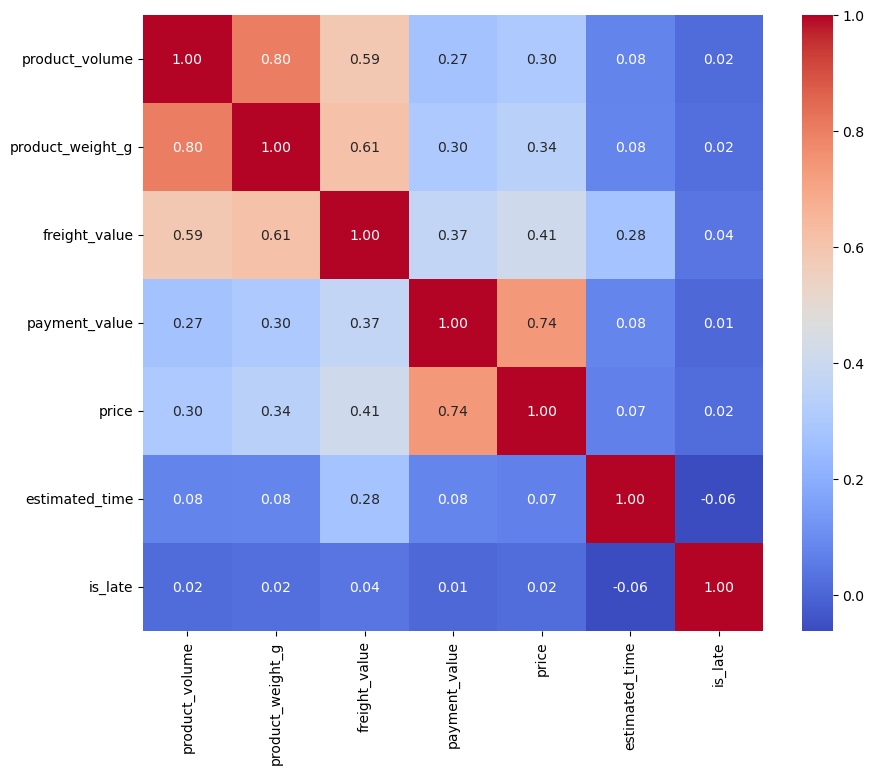

In [297]:
# Plot
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

In [298]:
# Feature Importance
importance_df = feature_importance(df_numeric.columns, rf.feature_importances_)

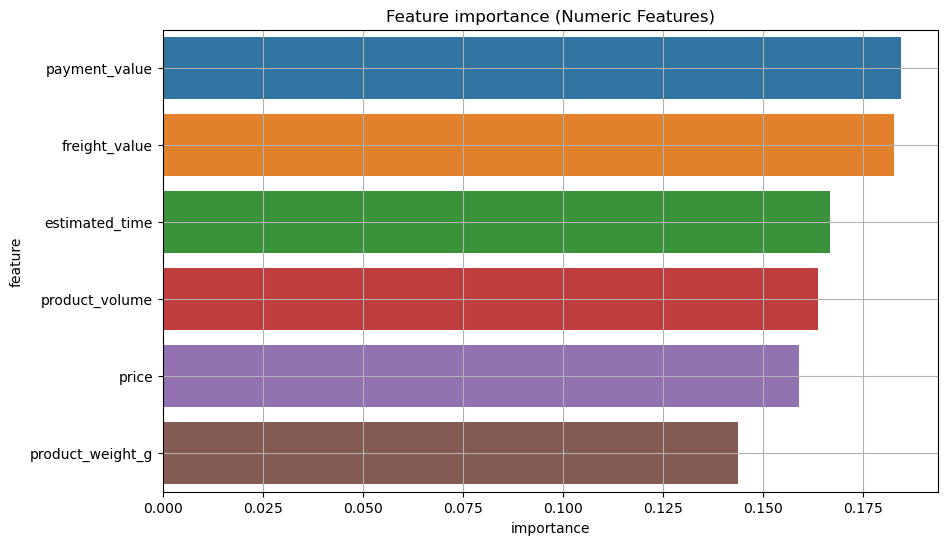

In [299]:
# Plot
importance_barplot('Feature importance (Numeric Features)')

#### First model try

In [306]:
# Train and test split
X = pd.concat([df_cat_transform, df_numeric], axis=1)
y = df_merged['is_late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [307]:
# Apply RandomForesrClassifier model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Feature importance
importance_df = feature_importance(X.columns, model.feature_importances_)


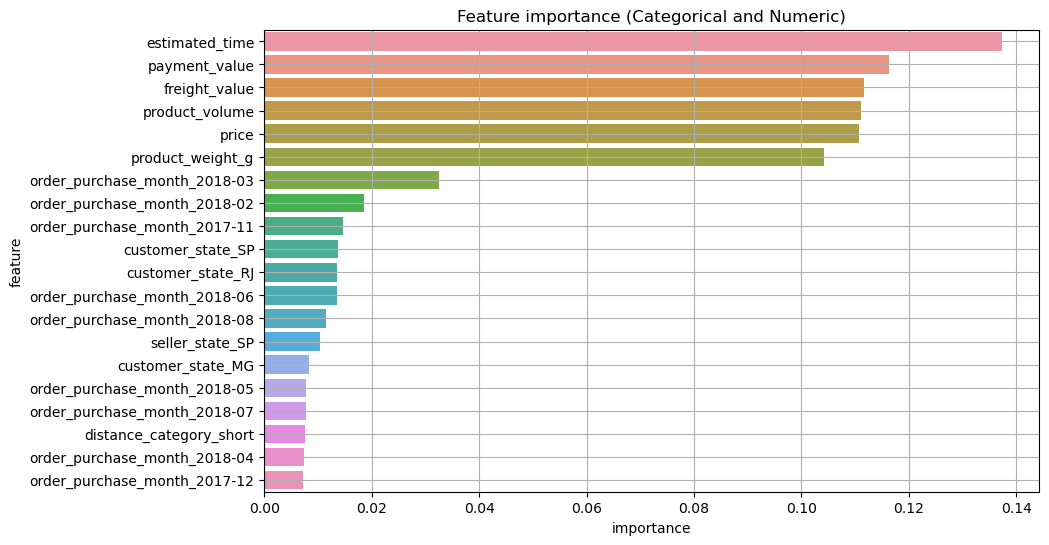

In [310]:
# Plot
importance_barplot('Feature importance (Categorical and Numeric)')

In [311]:
# Save predict data
y_pred = model.predict(X_test)

In [312]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21595   203]
 [ 1377   427]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21798
           1       0.68      0.24      0.35      1804

    accuracy                           0.93     23602
   macro avg       0.81      0.61      0.66     23602
weighted avg       0.92      0.93      0.92     23602



In [320]:
# Save the current data set for next modeling steps.
df_model = pd.concat([X, y], axis=1)
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..", "data", "processed"))


In [321]:
df_model.to_parquet(os.path.join(data_path, "df_model.parquet"))